# Data Description
### Dosyalar


- train.csv - Training veri seti
- test.csv - Test veri seti
- transaction_header.csv – Fiş bilgileri
- transaction_sale.csv – Fişlerin içerisindeki ürünlerin bilgileri
- product_groups.csv – Kampanya kategorilerinin denk geldiği kategori kırılımları
- customeraccount.csv – cardnumber-individualnumber eşleşmesi
- customer.csv – Müşterilerin demografik bilgileri
- genel_kategoriler.csv – Genel kategori isimleri.

# Customer
- individualnumber(bireysel numara)
- gender: Müşterinin cinsiyeti
- city code: Müşterinin il kodu
- dateofbirth: Müşterinin doğum yılı

In [162]:
import pandas as pd

In [163]:
data=pd.read_csv("customer.csv").copy()
data.head()

,individualnumber,gender,city_code,dateofbirth
0,94212124,K,NaN,1946.0
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
3,94694434,E,NaN,1970.0
4,47648671,E,35.0,1963.0


In [164]:
data.shape

(28593, 4)

In [165]:
sum(data["dateofbirth"]>2004)

12

In [166]:
data[data["dateofbirth"]>2004]

,individualnumber,gender,city_code,dateofbirth
1386,94466654,E,16.0,2048.0
6210,95560491,E,34.0,2046.0
7703,95489708,K,35.0,2034.0
9145,93787510,E,35.0,2040.0
10223,93037187,K,34.0,2047.0
12287,94506566,K,34.0,2045.0
14804,95272171,E,34.0,2049.0
15007,95029650,K,34.0,2042.0
16027,94426679,K,34.0,2048.0
18320,94542759,K,35.0,2045.0


In [167]:
data.drop(index=[1386,6210,7703,9145,10223,12287,14804,15007,16027,18320,20397,22447],inplace=True)

In [168]:
sum(data["dateofbirth"]>2004)

0

In [169]:
data[data["dateofbirth"]>2004]

,individualnumber,gender,city_code,dateofbirth


In [170]:
data.size

114324

In [171]:
data["individualnumber"].count()

28581

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28581 entries, 0 to 28592
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   individualnumber  28581 non-null  int64  
 1   gender            28576 non-null  object 
 2   city_code         21874 non-null  float64
 3   dateofbirth       28566 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ MB


In [173]:
data.isnull().any()

individualnumber    False
gender               True
city_code            True
dateofbirth          True
dtype: bool

In [174]:
data.isnull().sum()    

individualnumber       0
gender                 5
city_code           6707
dateofbirth           15
dtype: int64

In [175]:
data.isnull().sum().sum()

6727

In [176]:
data=data.dropna()

In [177]:
data.isnull().sum()    

individualnumber    0
gender              0
city_code           0
dateofbirth         0
dtype: int64

In [178]:
data.isnull().sum().sum()

0

In [179]:
data.size

87456

In [180]:
data.head()

,individualnumber,gender,city_code,dateofbirth
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
4,47648671,E,35.0,1963.0
5,97048907,K,39.0,1990.0
6,17778912,E,10.0,1979.0


In [181]:
data.tail()

,individualnumber,gender,city_code,dateofbirth
28587,94381561,K,35.0,1948.0
28588,94368469,K,34.0,1948.0
28589,90691477,E,7.0,1990.0
28590,95834384,E,22.0,1970.0
28591,92199848,E,34.0,1985.0


In [182]:
import seaborn as sns

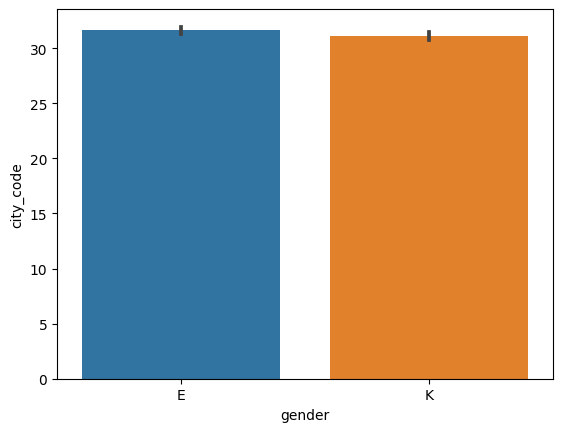

In [183]:
sns.barplot(x="gender",y="city_code",data=data);

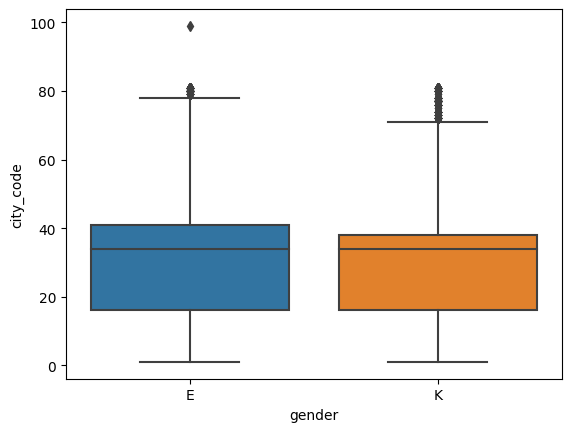

In [184]:
sns.boxplot(x="gender",y="city_code",data=data);

In [185]:
data[data["city_code"]>81]

,individualnumber,gender,city_code,dateofbirth
19409,16499908,E,99.0,1957.0


In [186]:
data.head()

,individualnumber,gender,city_code,dateofbirth
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
4,47648671,E,35.0,1963.0
5,97048907,K,39.0,1990.0
6,17778912,E,10.0,1979.0


In [187]:
from warnings import filterwarnings
filterwarnings("ignore")

In [188]:
data.drop(index=[19409],inplace=True)

In [189]:
data[data["city_code"]>81]

,individualnumber,gender,city_code,dateofbirth


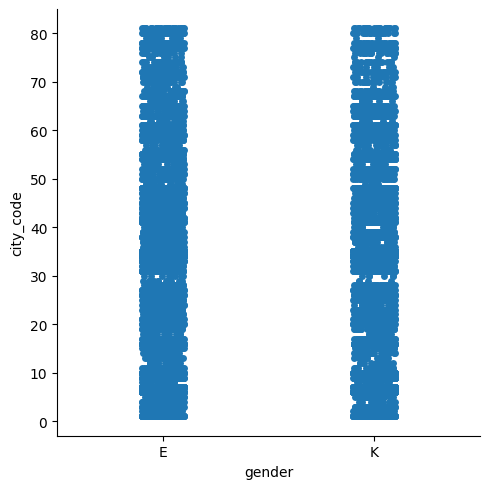

In [190]:
sns.catplot(x="gender",y="city_code",data=data);

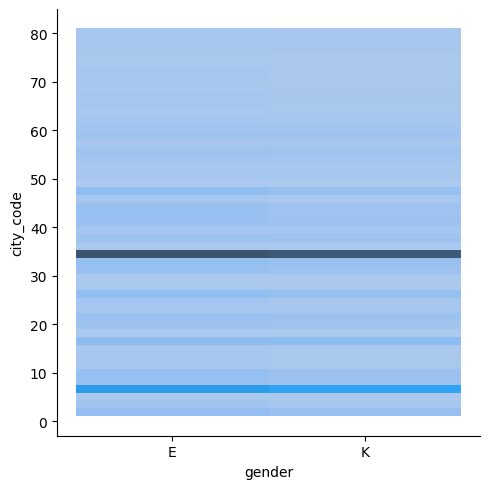

In [191]:
sns.displot(x="gender",y="city_code",data=data);

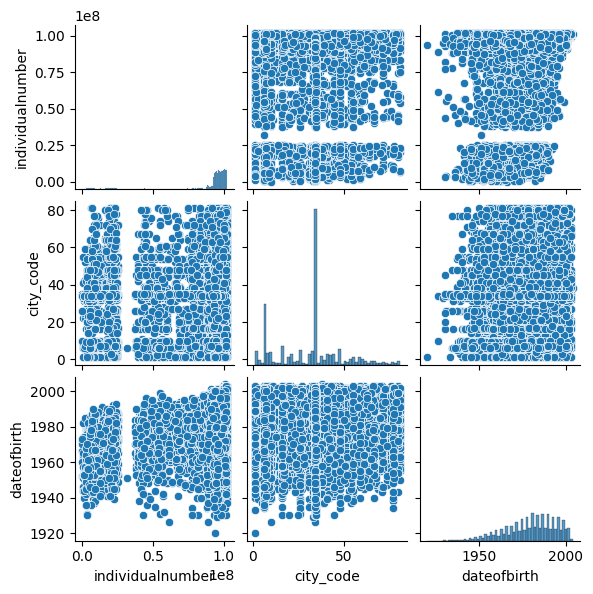

In [197]:
sns.pairplot(data,height=2);

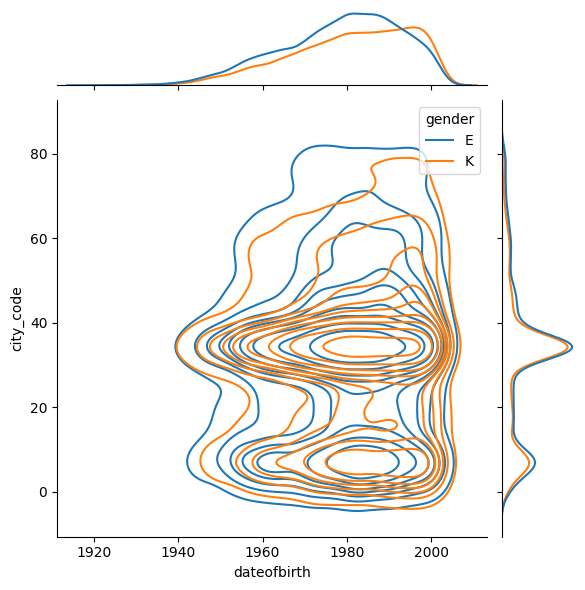

In [198]:
sns.jointplot(data=data,x="dateofbirth",y="city_code",hue="gender",kind="kde");

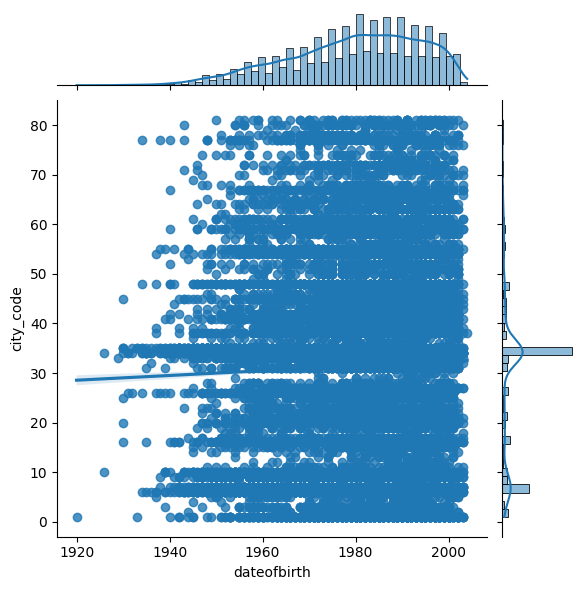

In [199]:
sns.jointplot(data=data,x="dateofbirth",y="city_code",kind="reg");

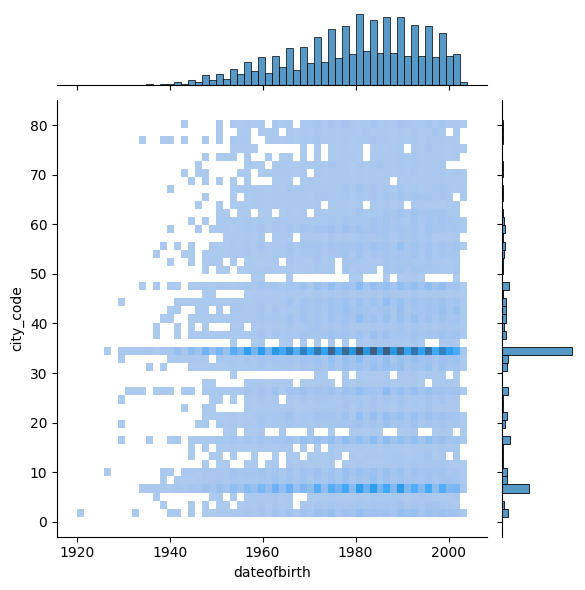

In [200]:
sns.jointplot(data=data,x="dateofbirth",y="city_code",kind="hist");

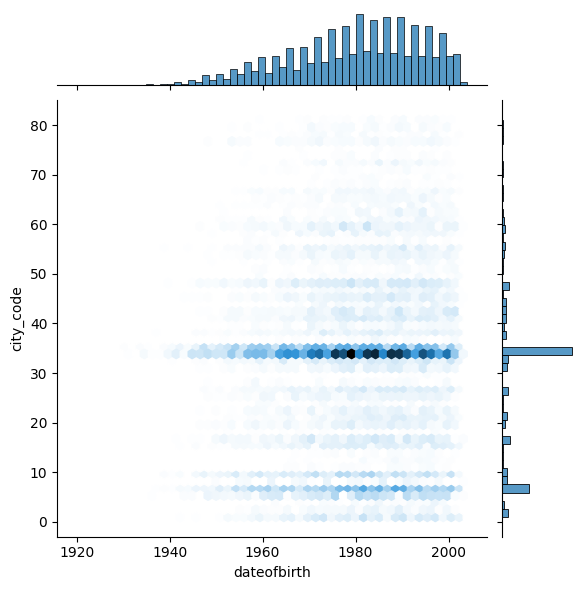

In [201]:
sns.jointplot(data=data,x="dateofbirth",y="city_code",kind="hex");

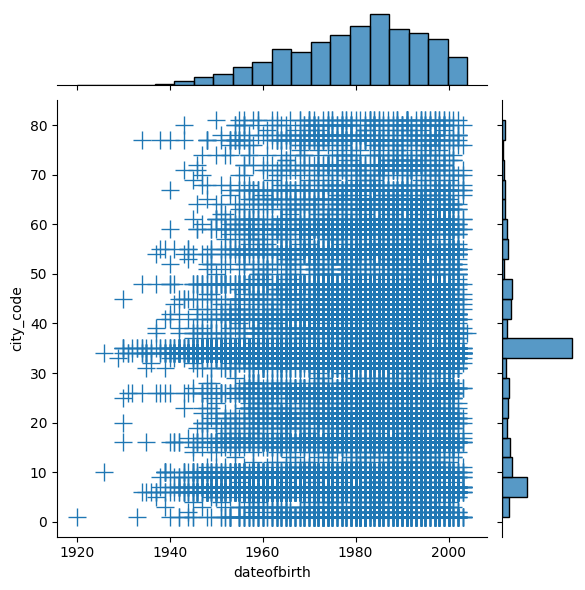

In [202]:
sns.jointplot(data=data,x="dateofbirth",y="city_code",
             marker="+",s=150,marginal_kws=dict(bins=20,fill=True));

In [204]:
new_data=data.drop(["gender","dateofbirth"],axis=1)

In [220]:
new_data[["city_code"]]

,city_code
1,34.0
2,80.0
4,35.0
5,39.0
6,10.0
...,...
28587,35.0
28588,34.0
28589,7.0
28590,22.0


In [221]:
data.head()

,individualnumber,gender,city_code,dateofbirth
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
4,47648671,E,35.0,1963.0
5,97048907,K,39.0,1990.0
6,17778912,E,10.0,1979.0


In [228]:
data.head()

,individualnumber,gender,city_code,dateofbirth
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
4,47648671,E,35.0,1963.0
5,97048907,K,39.0,1990.0
6,17778912,E,10.0,1979.0


In [29]:
data["gender"].count()

28588

In [30]:
pd.notnull(data["city_code"])

0        False
1         True
2         True
3        False
4         True
         ...  
28588     True
28589     True
28590     True
28591     True
28592    False
Name: city_code, Length: 28593, dtype: bool

In [31]:
import numpy as np

# Customer Account

- individualnumber: Promotion train/test tablosundaki individualnumber ile eşleşir.
- cardnumber: Transaction header tablosundaki customer_number ile eşleşir.

In [32]:
import pandas as pd
df=pd.read_csv("customeraccount.csv").copy()
df.head()

,individualnumber,cardnumber
0,16481068,7287134635560315
1,17634947,6587004647560415
2,19323290,8187034648564315
3,19323290,3005502487247749
4,37820213,6287114610560316


In [33]:
df.isnull().any().sum()

0

In [34]:
df["cardnumber"].count()

35159

In [35]:
df.size

70318

In [36]:
df.shape

(35159, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35159 entries, 0 to 35158
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   individualnumber  35159 non-null  int64
 1   cardnumber        35159 non-null  int64
dtypes: int64(2)
memory usage: 549.5 KB


In [38]:
df.describe([0.1,0.9]).T

,count,mean,std,min,10%,50%,90%,max
individualnumber,35159.0,8.596784e+07,2.551412e+07,3.069000e+04,4.172677e+07,9.532850e+07,1.009050e+08,1.022819e+08
cardnumber,35159.0,5.060966e+15,2.892552e+15,5.142451e+12,1.087025e+15,5.087515e+15,9.087147e+15,9.997905e+15


# Genel kategoriler

In [39]:
cate=pd.read_csv("genel_kategoriler.csv").copy()

In [40]:
cate

,category_number,genel_kategori
0,9052,diger
1,9053,diger
2,9054,diger
3,9055,gida
4,9056,gida
5,9057,diger
6,9058,gida
7,9059,hijyen
8,9060,kisisel_bakim
9,9061,kisisel_bakim


In [41]:
cate.size

100

In [42]:
cate.shape

(50, 2)

In [43]:
cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category_number  50 non-null     int64 
 1   genel_kategori   50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [44]:
cate.isnull().sum()

category_number    0
genel_kategori     0
dtype: int64

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'genel_kategori')

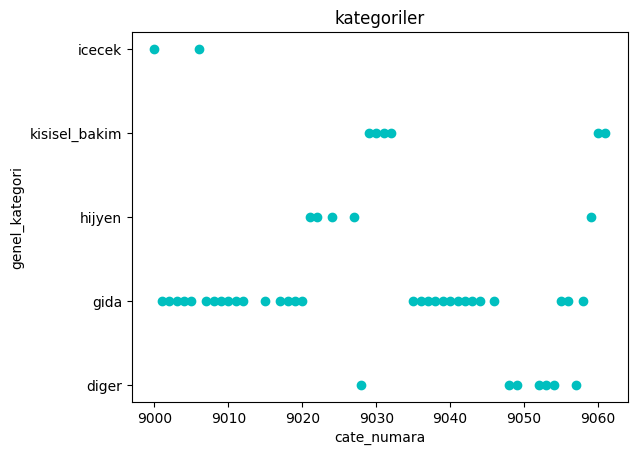

In [46]:
plt.scatter(x='category_number',y='genel_kategori',c='c',data=cate)

plt.title('kategoriler')
plt.xlabel('cate_numara')
plt.ylabel('genel_kategori')

# Product Groups

- category_number: Kampanyalarda kullanılan kategori.
- category_level_1: 1. Seviye Kategori (Kategori hiyerarşisinin en üst seviyesi)
- category_level_2: 2. Seviye Kategori
- category_level_3: 3. Seviye Kategori
- category_level_4: 4. Seviye Kategori (Kategori hiyerarşisinin en alt seviyesi)

In [47]:
pg=pd.read_csv("product_groups.csv").copy()

In [48]:
pg.head()

,category_number,category_level_1,category_level_2,category_level_3,category_level_4
0,9046,341,20,10,10
1,9009,125,25,10,10
2,9049,410,65,20,10
3,9019,300,10,19,11
4,9035,305,31,10,10


In [49]:
pg.size

19565

In [50]:
pg.shape

(3913, 5)

In [51]:
pg.isnull().sum()

category_number     0
category_level_1    0
category_level_2    0
category_level_3    0
category_level_4    0
dtype: int64

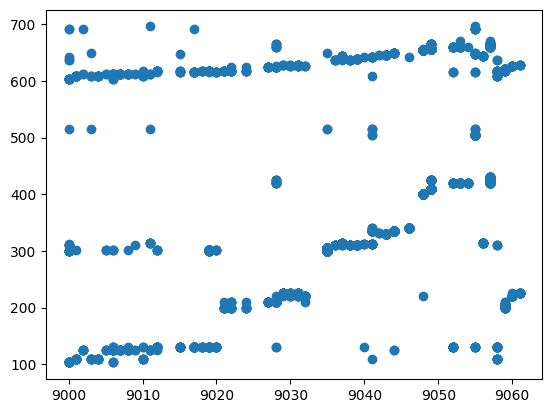

In [52]:
plt.scatter(x="category_number",y="category_level_1",data=pg);

# Transaction Header

- date_of_transaction: Fiş tarihi
- basketid: Fiş numarası
- cardnumber: Alışverişte kullanılan kart numarası (customeraccount tablosundaki cardnumber ile eşleşmektedir)
-  is_sanal: Fişin karşılık geldiği alışverişin sanal olma durumu (1: Sanal Alışveriş, 0: Mağaza Alışverişi)

In [57]:
trans_hea=pd.read_csv("transaction_header.csv").copy()

In [58]:
trans_hea

,date_of_transaction,cardnumber,basketid,is_sanal
0,2020-12-01,8487374630565615,20120163990041163,0
1,2020-12-01,4287574603569015,20120163990016137,0
2,2020-12-01,6487154648560315,20120160080017338,0
3,2020-12-01,3787564693563915,20120163570105022,0
4,2020-12-01,9087994683569715,20120162340016645,0
...,...,...,...,...
1124668,2021-12-01,5187224618568515,21120111950019800,0
1124669,2021-12-01,87714689568015,21120111830079927,0
1124670,2021-12-01,3287454606560415,21120110690047978,0
1124671,2021-12-01,9887854616568815,21120110000068135,0


In [59]:
trans_hea.isnull().sum()

date_of_transaction    0
cardnumber             0
basketid               0
is_sanal               0
dtype: int64

In [61]:
print(df["cardnumber"].count())
print(trans_hea["cardnumber"].count())

35159
1124673


In [62]:
trans_hea["basketid"].count()

1124673

In [63]:
trans_hea.size

4498692

In [64]:
trans_hea.shape

(1124673, 4)

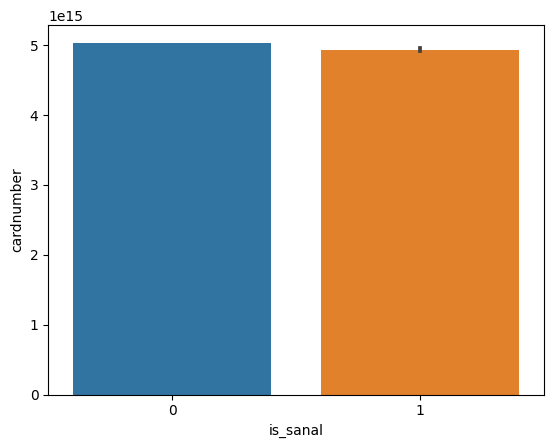

In [72]:
sns.barplot(x="is_sanal",y="cardnumber",data=trans_hea);

# Transaction Sale

- basketid: Ürünün içerisinde geçtiği fişin numarası
- category_level_1: 1. Seviye Kategori (Kategori hiyerarşisinin en üst seviyesi)
- category_level_2: 2. Seviye Kategori
- category_level_3: 3. Seviye Kategori
- category_level_4: 4. Seviye Kategori (Kategori hiyerarşisinin en alt seviyesi)
- amount: Ürün tutarı
- quantity: Birim olarak satılan ürünlerde ürün sayısı, ağırlığı tartılarak satılan ürünlerde ürünün ağırlığı
- discount_type_1: Birinci tip indirimin yüzdesi
- discount_type_2: İkinci tip indirimin yüzdesi
- discount_type_3: Üçüncü tip indirimin yüzdesi

In [73]:
trans_sale=pd.read_csv("transaction_sale.csv").copy()

In [74]:
trans_sale.head()

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,20120706070177471,613,50,50,15,19.9,2.0,NaN,0.0,0.0
1,20120706070177471,425,30,12,10,3.5,1.0,NaN,0.0,0.0
2,20120706070177471,425,30,12,11,7.9,1.0,NaN,0.0,0.0
3,20122703940031323,103,25,15,10,7.9,2.0,NaN,0.0,0.0
4,20122703940031323,101,15,15,15,16.0,1.0,NaN,0.0,0.0


In [75]:
trans_sale.tail()

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
6537876,20120839080026509,103,35,10,10,2.95,1.0,NaN,0.0,0.00
6537877,20120839080026509,130,85,11,10,3.40,1.0,NaN,0.0,0.00
6537878,20120839080026509,131,10,10,20,4.45,1.0,NaN,0.0,0.00
6537879,21101831040099839,103,35,10,10,0.01,1.0,NaN,0.0,1.24
6537880,21101831040099839,101,15,15,15,15.50,1.0,NaN,0.0,0.00


In [76]:
trans_sale.shape

(6537881, 10)

In [77]:
trans_sale.isnull().sum()

basketid                  0
category_level_1          0
category_level_2          0
category_level_3          0
category_level_4          0
amount                    0
quantity                  0
discount_type_1     4648873
discount_type_2         130
discount_type_3         128
dtype: int64

In [78]:
trans_sale.isnull().sum().sum()

4649131

In [79]:
trans_sale["basketid"].count()

6537881

# Promotion Train/Test

- individualnumber: Müşterinin kişi numarası
- category_number: Kampanyanın çıkıldığı kampanya kategorisi.
- hakkedis_amt: Kampanyadan yararlanabilmek için belirtilen kategoride yapılması gereken minimum harcama tutarı (TL)
- odul_amt: Kampanyadan yararlanıldığında elde edilecek ödül puan miktarı
- response: Müşterinin kampanyadan yararlanma durumu (1: Yararlandı, 0: Yararlanmadı) LABEL KOLONU

In [80]:
train=pd.read_csv("train.csv").copy()
test=pd.read_csv("test.csv").copy()

In [81]:
train.head()

,individualnumber,category_number,hakkedis_amt,odul_amt,response
0,94230288,9000,21.0,2.0,0
1,4684087,9000,17.0,1.0,0
2,92472145,9058,24.0,3.0,0
3,88026681,9030,22.0,2.0,0
4,98127795,9001,38.0,3.0,0


In [102]:
test.head()

,individualnumber,category_number,hakkedis_amt,odul_amt
0,95812936,9029,38.0,3.0
1,23929570,9012,28.0,2.0
2,95948115,9019,21.0,2.0
3,100898513,9035,48.0,4.0
4,12769156,9015,26.0,3.0


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   individualnumber  13115 non-null  int64  
 1   category_number   13115 non-null  int64  
 2   hakkedis_amt      13115 non-null  float64
 3   odul_amt          13115 non-null  float64
 4   response          13115 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 512.4 KB


In [84]:
train.size

65575

In [86]:
train.shape

(13115, 5)

In [101]:
train["response"].unique().sum()

1

In [87]:
train.corr()

,individualnumber,category_number,hakkedis_amt,odul_amt,response
individualnumber,1.000000,0.021322,0.070525,0.037902,-0.105455
category_number,0.021322,1.000000,0.402471,0.384415,-0.025876
hakkedis_amt,0.070525,0.402471,1.000000,0.973455,0.025207
odul_amt,0.037902,0.384415,0.973455,1.000000,0.061195
response,-0.105455,-0.025876,0.025207,0.061195,1.000000


In [88]:
test.corr()

,individualnumber,category_number,hakkedis_amt,odul_amt
individualnumber,1.000000,0.026269,0.090615,0.051188
category_number,0.026269,1.000000,0.392356,0.376326
hakkedis_amt,0.090615,0.392356,1.000000,0.973336
odul_amt,0.051188,0.376326,0.973336,1.000000


# Prediciton

In [103]:
submission=pd.read_csv("sample_submission.csv")

In [104]:
submission.head()

,individualnumber,response
0,95812936,NaN
1,23929570,NaN
2,95948115,NaN
3,100898513,NaN
4,12769156,NaN
